<a href="https://colab.research.google.com/github/18520133/CS331.L21/blob/main/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount gg drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import os
# import cv2
# path = '/content/drive/MyDrive/data_AdvancedCV/sofa'
# imgs = os.listdir(path)
# for i in range(len(imgs)):
#   imgs[i] = path + '/' + imgs[i]

# #os.rename(imgs[0], path + "/bed_"+str(0)+".jpg")
# for i in range(len(imgs)):
#   os.rename(imgs[i], path + "/sofa_"+str(i)+".jpg")


#Import các thư viện

In [ ]:
# import thư viện
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from imutils import paths
import os

import pandas as pd
import numpy as np

#Tiền xử lí dữ liệu

In [ ]:
# get feature from model
def getFeature(imagePath, model,):
  # preprocess image
  image = load_img(imagePath,target_size=(224,224))
  img_array = img_to_array(image)
  img_array = np.expand_dims(img_array, axis=0)
  img_array=tf.image.per_image_standardization(img_array)

  # get feature 
  feature = model.predict(img_array)
  feature = feature.reshape(-1)

  return feature

In [ ]:
# feature extraction
import os
def featureExtraction(imageDir, model):
  imagePaths = list(paths.list_images(imageDir))

  features = []
  names = []

  for imagePath in imagePaths:
    names.append(imagePath.split(os.path.sep)[-1])
    features.append(getFeature(imagePath,model))
    
  
  # create dataFrame
  # dataset = pd.DataFrame(
  # {
  #   "Featrues": features,
  #   "labels" : labels   
  # })
  return np.array(features),np.array(names)

In [ ]:
# imageDir = "/content/drive/MyDrive/data_AdvancedCV"
# imagePaths = list(paths.list_images(imageDir))

# features = []
# labels = []

# for imagePath in imagePaths:
#     #label = imagePath.split(os.path.sep)[-1]
#     #features.append(getFeature(imagePath,model))
#     labels.append(imagePath.split(os.path.sep)[-1])



['bed_0.jpg', 'bed_1.jpg', 'bed_2.jpg', 'bed_3.jpg', 'bed_4.jpg', 'bed_5.jpg', 'bed_6.jpg', 'bed_7.jpg', 'bed_8.jpg', 'bed_9.jpg', 'bed_10.jpg', 'bed_11.jpg', 'bed_12.jpg', 'bed_13.jpg', 'bed_14.jpg', 'bed_15.jpg', 'bed_16.jpg', 'bed_17.jpg', 'bed_18.jpg', 'bed_19.jpg', 'bed_20.jpg', 'bed_21.jpg', 'bed_22.jpg', 'bed_23.jpg', 'bed_24.jpg', 'bed_25.jpg', 'bed_26.jpg', 'bed_27.jpg', 'bed_28.jpg', 'bed_29.jpg', 'bed_30.jpg', 'bed_31.jpg', 'bed_32.jpg', 'bed_33.jpg', 'bed_34.jpg', 'bed_35.jpg', 'bed_36.jpg', 'bed_37.jpg', 'bed_38.jpg', 'bed_39.jpg', 'bed_40.jpg', 'bed_41.jpg', 'bed_42.jpg', 'bed_43.jpg', 'bed_44.jpg', 'bed_45.jpg', 'bed_46.jpg', 'bed_47.jpg', 'bed_48.jpg', 'bed_49.jpg', 'bed_50.jpg', 'bed_51.jpg', 'bed_52.jpg', 'bed_53.jpg', 'bed_54.jpg', 'bed_55.jpg', 'bed_56.jpg', 'bed_57.jpg', 'bed_58.jpg', 'bed_59.jpg', 'bed_60.jpg', 'bed_61.jpg', 'bed_62.jpg', 'bed_63.jpg', 'bed_64.jpg', 'bed_65.jpg', 'bed_66.jpg', 'bed_67.jpg', 'bed_68.jpg', 'bed_69.jpg', 'bed_70.jpg', 'bed_71.jpg', '

#Lưu lại features và labels của từng lớp

In [ ]:
# main function
if __name__ ==  "__main__":
  pathDir = '/content/drive/MyDrive/data_AdvancedCV'

  # setting model
  vgg_19=VGG19(input_shape=(224,224,3),include_top=True, weights='imagenet')
  vgg_19.summary()
  # feature extraction
  # FC1
  model=Sequential()
  for layer in vgg_19.layers[:-2]:
    model.add(layer)
  model.summary()
  features_1 , names_1 = featureExtraction(pathDir, model)
  np.savetxt("/content/drive/MyDrive/data_AdvancedCV/FC1_features_new.txt",features_1)
  #np.savetxt("/content/drive/MyDrive/data_AdvancedCV/FC1_names_new.txt",labels_1)

  # FC2
  model=Sequential()
  for layer in vgg_19.layers[:-1]:
    model.add(layer)
  model.summary()
  features_2, names_2 = featureExtraction(pathDir, model)
  np.savetxt("/content/drive/MyDrive/data_AdvancedCV/FC2_features_new.txt",features_2)
  #np.savetxt("/content/drive/MyDrive/data_AdvancedCV/FC2_names_new.txt",labels_2)

  # # show 
  # print(dt_feature)
  # print(dataset.shape)

  # print(dataset2)
  # print(dataset.shape)

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

#Import các thư viện cần thiết để trainning

In [ ]:

# thêm thư viện.
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# đọc dữ liệu từ các file .txt thông qua thư viện numpy.
feature_FC1 = np.loadtxt('/content/drive/MyDrive/data_AdvancedCV/FC1_features_new.txt')
feature_FC2 = np.loadtxt('/content/drive/MyDrive/data_AdvancedCV/FC2_features_new.txt')


#labels_FC1 = np.loadtxt('/content/drive/MyDrive/data_AdvancedCV/FC1_labels.txt')
#labels_FC2 = np.loadtxt('/content/drive/MyDrive/data_AdvancedCV/FC1_labels.txt')

print(feature_FC1)
print(feature_FC2)

[[0.         1.97360063 0.         ... 0.         3.1807344  0.        ]
 [0.         1.73837936 0.         ... 0.         2.10789108 0.        ]
 [0.         1.69511855 0.         ... 0.         2.46825147 0.        ]
 ...
 [0.         1.5026716  0.         ... 0.         2.81516671 0.        ]
 [0.         2.06340075 0.         ... 0.         2.5481832  0.5587256 ]
 [0.         2.00384998 0.         ... 0.         2.28582025 0.19120899]]
[[1.21741903 0.65555513 0.67978579 ... 0.         0.29175815 0.09483522]
 [0.34068438 0.20429894 1.27433348 ... 0.         0.09038761 0.        ]
 [0.64563495 0.58978111 0.6615147  ... 0.         0.24896601 0.        ]
 ...
 [0.71119678 0.16609001 0.44919023 ... 0.         0.2597754  0.37782875]
 [0.25526911 0.00696886 0.32246304 ... 0.         0.64894378 0.43747863]
 [0.37888485 0.         0.37397802 ... 0.         0.50458348 0.22700769]]


In [ ]:
print()

#Chia data thành 2 phần train và test

In [ ]:
# tiến hành chia dữ liệu để thực hiện quá trình ra 2 phần train và test.
feature_FC1_train, feature_FC1_test, names_FC1_train, names_FC1_test = train_test_split(feature_FC1, names_1, test_size = 0.2, random_state = 1)
feature_FC2_train, feature_FC2_test, names_FC2_train, names_FC2_test = train_test_split(feature_FC2, names_2, test_size = 0.2, random_state = 1)

In [ ]:
# print(names_FC1_test, names_FC1_train)
# print(names_FC2_test, names_FC2_train)

In [ ]:
labels_FC1_test = []
for i in range(len(names_FC1_test)):
  if(names_FC1_test[i].split('_')[0] == "bed"):
    labels_FC1_test.append(0)
  if(names_FC1_test[i].split('_')[0] == "sofa"):
    labels_FC1_test.append(1)

labels_FC1_train = []
for i in range(len(names_FC1_train)):
  if(names_FC1_train[i].split('_')[0] == "bed"):
    labels_FC1_train.append(0)
  if(names_FC1_train[i].split('_')[0] == "sofa"):
    labels_FC1_train.append(1)

labels_FC2_test = []
for i in range(len(names_FC2_test)):
  if(names_FC2_test[i].split('_')[0] == "bed"):
    labels_FC2_test.append(0)
  if(names_FC2_test[i].split('_')[0] == "sofa"):
    labels_FC2_test.append(1)

labels_FC2_train = []
for i in range(len(names_FC1_train)):
  if(names_FC2_train[i].split('_')[0] == "bed"):
    labels_FC2_train.append(0)
  if(names_FC2_train[i].split('_')[0] == "sofa"):
    labels_FC2_train.append(1)

#FC1

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.94      1.00      0.97        16

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40

Confusion matrix:
[[23  0]
 [ 1 16]]


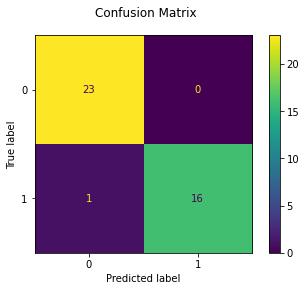

In [ ]:
# tạo một bộ phân loại.
clf_FC1 = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# tiến hành học từ tập dữ liệu train.
clf_FC1.fit(feature_FC1_train, labels_FC1_train)

# tiến hành dự đoán dựa trên tập test
predicted_FC1 = clf_FC1.predict(feature_FC1_test)

# hiển thị các chỉ số đánh giá chính.
print(classification_report(predicted_FC1, labels_FC1_test))

# hiển thị ma trận Confusion matrix
conf_FC1 = metrics.plot_confusion_matrix(clf_FC1, feature_FC1_test, labels_FC1_test)
conf_FC1.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{conf_FC1.confusion_matrix}")
plt.show()

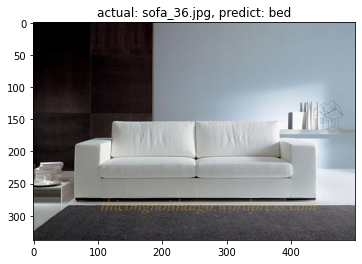

In [ ]:
for i in range(len(feature_FC1_test)):
  if(predicted_FC1[i]!=labels_FC1_test[i]):
    image = mpimg.imread('/content/drive/MyDrive/data_AdvancedCV/'+names_FC1_test[i].split('_')[0]+'/'+names_FC1_test[i])
    # <something gets done here>
    plt.figure()
    if (predicted_FC1[i]==0):
      plt.title("actual: "+names_FC1_test[i] + ", predict: bed")
    else:
      plt.title("actual: "+names_FC1_test[i] + ", predict: sofa")
    plt.imshow(image)
    #print(names_FC1_test[i])

#FC2

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.94      1.00      0.97        16

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40

Confusion matrix:
[[23  0]
 [ 1 16]]


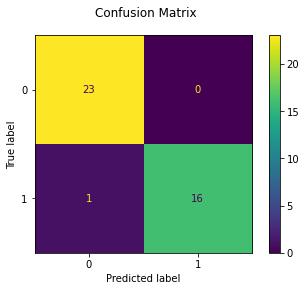

In [ ]:
# tạo một bộ phân loại.
clf_FC2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# tiến hành học từ tập dữ liệu train.
clf_FC2.fit(feature_FC2_train, labels_FC2_train)

# tiến hành dự đoán dựa trên tập test
predicted_FC2 = clf_FC2.predict(feature_FC2_test)

# hiển thị các chỉ số đánh giá chính.
print(classification_report(predicted_FC2, labels_FC2_test))

# hiển thị ma trận Confusion matrix
conf_FC2 = metrics.plot_confusion_matrix(clf_FC2, feature_FC2_test, labels_FC2_test)
conf_FC2.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{conf_FC2.confusion_matrix}")
plt.show()

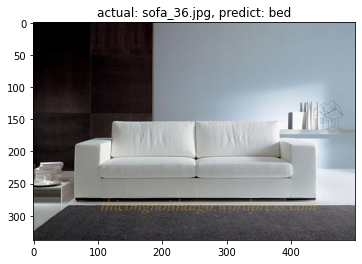

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(len(feature_FC2_test)):
  if(predicted_FC2[i]!=labels_FC2_test[i]):
    
    #im = Image.open('/content/drive/MyDrive/data_AdvancedCV/'+names_FC2_test[i].split('_')[0]+'/'+names_FC2_test[i])
    image = mpimg.imread('/content/drive/MyDrive/data_AdvancedCV/'+names_FC2_test[i].split('_')[0]+'/'+names_FC2_test[i])
    # <something gets done here>
    #print(predicted_FC2[i])
    plt.figure()
    if (predicted_FC2[i]==0):
      plt.title("actual: "+names_FC2_test[i] + ", predict: bed")
    else:
      plt.title("actual: "+names_FC2_test[i] + ", predict: sofa")
    plt.imshow(image)
    


# K-Fold

##FC1

Bắt đầu train Fold  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion matrix:
[[10  0]
 [ 0 10]]


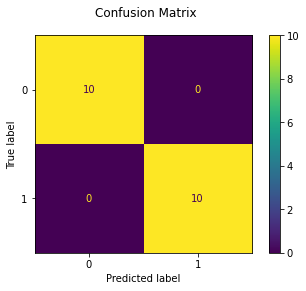

Bắt đầu train Fold  2
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.83      0.91      0.87        11

    accuracy                           0.85        20
   macro avg       0.85      0.84      0.85        20
weighted avg       0.85      0.85      0.85        20

Confusion matrix:
[[ 7  1]
 [ 2 10]]


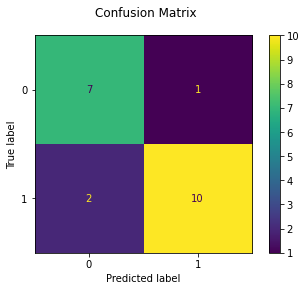

Bắt đầu train Fold  3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion matrix:
[[ 8  0]
 [ 0 12]]


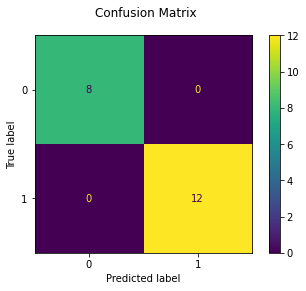

Bắt đầu train Fold  4
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Confusion matrix:
[[ 9  1]
 [ 0 10]]


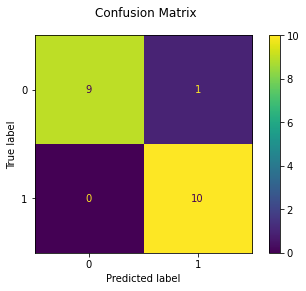

Bắt đầu train Fold  5
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.71      0.83         7

    accuracy                           0.90        20
   macro avg       0.93      0.86      0.88        20
weighted avg       0.91      0.90      0.90        20

Confusion matrix:
[[13  2]
 [ 0  5]]


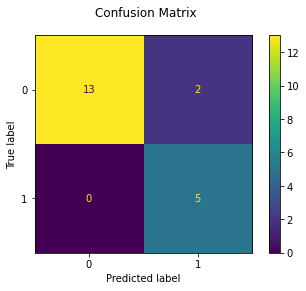

Bắt đầu train Fold  6
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20

Confusion matrix:
[[ 7  0]
 [ 3 10]]


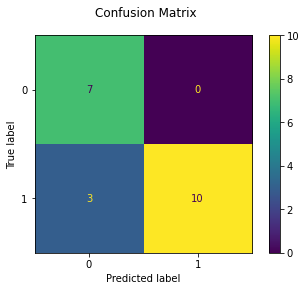

Bắt đầu train Fold  7
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.67      0.67      0.67         6

    accuracy                           0.80        20
   macro avg       0.76      0.76      0.76        20
weighted avg       0.80      0.80      0.80        20

Confusion matrix:
[[12  2]
 [ 2  4]]


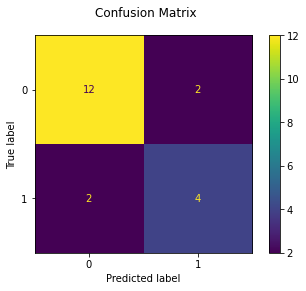

Bắt đầu train Fold  8
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Confusion matrix:
[[ 9  1]
 [ 0 10]]


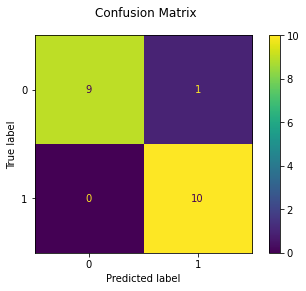

Bắt đầu train Fold  9
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.67      0.89      0.76         9

    accuracy                           0.75        20
   macro avg       0.77      0.76      0.75        20
weighted avg       0.78      0.75      0.75        20

Confusion matrix:
[[7 1]
 [4 8]]


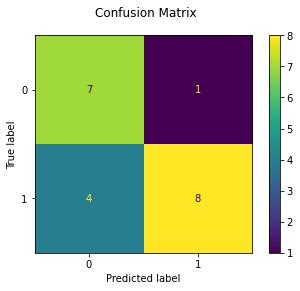

Bắt đầu train Fold  10
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Confusion matrix:
[[10  0]
 [ 1  9]]


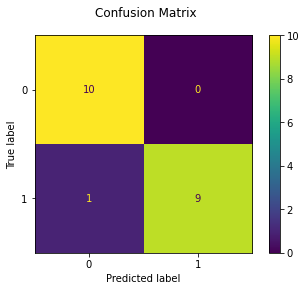

In [ ]:
 from sklearn.model_selection import KFold

 X = np.concatenate((feature_FC1_train, feature_FC1_test), axis=0)
 y = np.concatenate((labels_FC1_train, labels_FC1_test), axis=0)
 clf_FC1 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
 kfold = KFold(n_splits=10, shuffle=True)

 fold_idx = 1


 for train_ids, val_ids in kfold.split(X, y):

   print("Bắt đầu train Fold ", fold_idx)
 
   # Train model
   clf_FC1.fit(X[train_ids], y[train_ids])
 
   # Tiến hành dự đoán dựa trên tập test
   predicted_FC1 = clf_FC1.predict(X[val_ids])

   # Hiển thị các chỉ số đánh giá chính.
   print(classification_report(predicted_FC1, y[val_ids]))
 
   # Thêm thông tin accuracy và loss vào list
   conf_FC1 = metrics.plot_confusion_matrix(clf_FC1, X[val_ids], y[val_ids])
   conf_FC1.figure_.suptitle("Confusion Matrix")
   print(f"Confusion matrix:\n{conf_FC1.confusion_matrix}")
   plt.show()
   # Sang Fold tiếp theo
   fold_idx = fold_idx + 1

##FC2

Bắt đầu train Fold  1
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.88      0.88      0.88         8

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

Confusion matrix:
[[11  1]
 [ 1  7]]


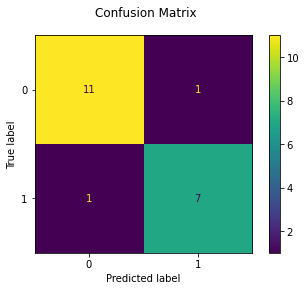

Bắt đầu train Fold  2
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20

Confusion matrix:
[[10  2]
 [ 0  8]]


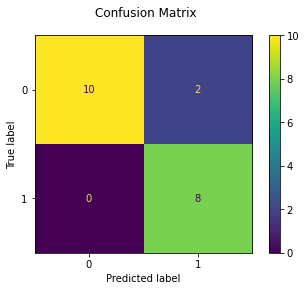

Bắt đầu train Fold  3
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        12

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

Confusion matrix:
[[ 7  1]
 [ 1 11]]


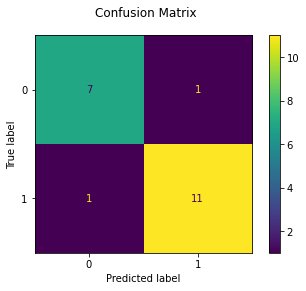

Bắt đầu train Fold  4
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion matrix:
[[12  0]
 [ 0  8]]


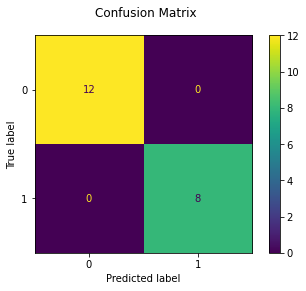

Bắt đầu train Fold  5
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.82      1.00      0.90         9

    accuracy                           0.90        20
   macro avg       0.91      0.91      0.90        20
weighted avg       0.92      0.90      0.90        20

Confusion matrix:
[[9 0]
 [2 9]]


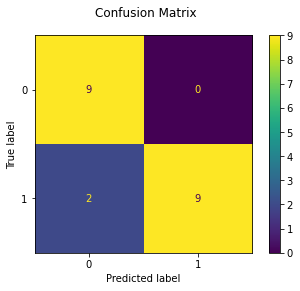

Bắt đầu train Fold  6
              precision    recall  f1-score   support

           0       0.90      0.56      0.69        16
           1       0.30      0.75      0.43         4

    accuracy                           0.60        20
   macro avg       0.60      0.66      0.56        20
weighted avg       0.78      0.60      0.64        20

Confusion matrix:
[[9 1]
 [7 3]]


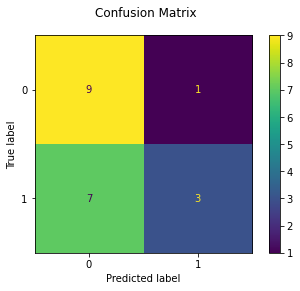

Bắt đầu train Fold  7
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.92      1.00      0.96        11

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20

Confusion matrix:
[[ 8  0]
 [ 1 11]]


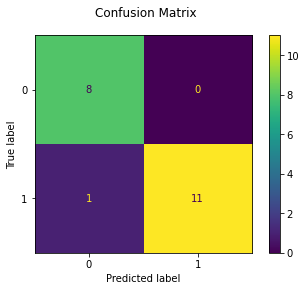

Bắt đầu train Fold  8
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.85      0.92      0.88        12

    accuracy                           0.85        20
   macro avg       0.85      0.83      0.84        20
weighted avg       0.85      0.85      0.85        20

Confusion matrix:
[[ 6  1]
 [ 2 11]]


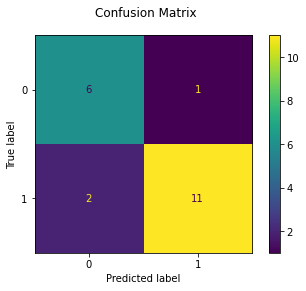

Bắt đầu train Fold  9
              precision    recall  f1-score   support

           0       1.00      0.69      0.82        13
           1       0.64      1.00      0.78         7

    accuracy                           0.80        20
   macro avg       0.82      0.85      0.80        20
weighted avg       0.87      0.80      0.80        20

Confusion matrix:
[[9 0]
 [4 7]]


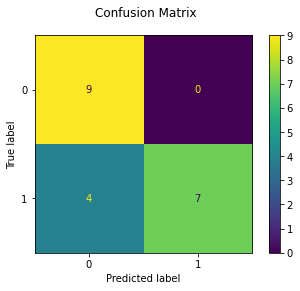

Bắt đầu train Fold  10
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.86      1.00      0.92         6

    accuracy                           0.95        20
   macro avg       0.93      0.96      0.94        20
weighted avg       0.96      0.95      0.95        20

Confusion matrix:
[[13  0]
 [ 1  6]]


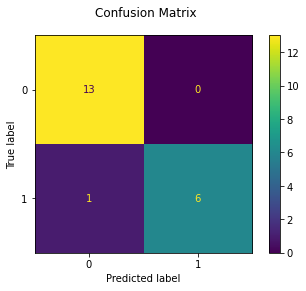

In [ ]:
 X = np.concatenate((feature_FC2_train, feature_FC2_test), axis=0)
 y = np.concatenate((labels_FC2_train, labels_FC2_test), axis=0)
 clf_FC2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
 kfold = KFold(n_splits=10, shuffle=True)

 fold_idx = 1


 for train_ids, val_ids in kfold.split(X, y):

   print("Bắt đầu train Fold ", fold_idx)
 
   # Train model
   clf_FC2.fit(X[train_ids], y[train_ids])
 
   # Tiến hành dự đoán dựa trên tập test
   predicted_FC2 = clf_FC2.predict(X[val_ids])

   # Hiển thị các chỉ số đánh giá chính.
   print(classification_report(predicted_FC2, y[val_ids]))
 
   # Thêm thông tin accuracy và loss vào list
   conf_FC2 = metrics.plot_confusion_matrix(clf_FC2, X[val_ids], y[val_ids])
   conf_FC2.figure_.suptitle("Confusion Matrix")
   print(f"Confusion matrix:\n{conf_FC2.confusion_matrix}")
   plt.show()
   # Sang Fold tiếp theo
   fold_idx = fold_idx + 1